In [1]:
import sys
sys.path.append('/cluster/home/bdayan/girgs/nemo-eva/src/')
sys.path+= ['/cluster/apps/nss/gcc-6.3.0/python_gpu/3.8.5', '/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python38.zip', '/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8', '/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/lib-dynload']
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/')

import numpy as np

# import feature_extractor


#
# from feature_extractor import FeatureExtractor

import pandas as pd
import glob

import os
import do_feature_extract
import networkit

from benji_girgs import utils, mcmc, generation, points
import networkit as nk
import networkx as nx

import matplotlib.pyplot as plt
import multiprocessing as mp
import torch

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



os.environ['DATA_PATH'] = '/cluster/home/bdayan/girgs/FE_FB_copyweights_cube/'

df = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')
df.Info = df.Info.apply(lambda temp: {key: eval(var) for key, var in [x.split('=') for x in temp.split('|')]} if (type(temp) is str and '|' in temp) else {
    })
df['alpha'] = df.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)
mini_df = df.loc[df.Model == '1d-copyweight-cube-girg'].sort_values('Nodes').loc[:,['Graph', 'Model', 'Nodes', 'Info'] ]


/cluster/scratch/bdayan/GIRG_data/socfb-Brandeis99.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Georgetown15.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UC64.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MIT.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-WashU32.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-William77.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Pepperdine86.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Emory27.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Lehigh96.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Mich67.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Princeton12.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Rice31.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Columbia2.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Williams40.SpaceOne
/cl

In [21]:
n = 1000

tau = 2.2
alpha = 1.3

g = generation.generate_chung_lu(n, tau, 60)


In [22]:
import importlib
importlib.reload(mcmc)

<module 'benji_girgs.mcmc' from '/cluster/home/bdayan/girgs/benji_src/benji_girgs/mcmc.py'>

In [25]:
d2 = 2
mc_name = f'{n} node chunglu gen; {d2}d fit cube GIRG'

a, B, pts = utils.get_diffmap_and_points(g, ds=d2, process='restrict_uniform_edges')
pts = points.PointsCube(pts)
weights = np.array(utils.graph_degrees_to_weights(g))

MC = mcmc.MCMC_girg(g, weights.copy(), alpha, 1.0, pts.copy(), pool=False, graph_name=mc_name,
                    failure_prob=0.3, cl_mixin_prob=0.5)
self=MC

MC.to_pytorch()

In [26]:
MC.ordered_pts_const_alpha_loop_pytorch(lr=1e-4, use_tqdm=True)

100%|██████████| 1000/1000 [00:02<00:00, 475.41it/s]


{'loop': 0, 'll': tensor(-164543.6250), 'out': array([[ 15250,  44432],
       [ 44302, 896016]]), 'pec': 0.25552092758285583, 'alpha': 1.0259425231297497}


100%|██████████| 1000/1000 [00:02<00:00, 473.18it/s]


{'loop': 1, 'll': tensor(-163526.2969), 'out': array([[ 15724,  43958],
       [ 44234, 896084]]), 'pec': 0.26346302067625077, 'alpha': 1.003092140489753}


100%|██████████| 1000/1000 [00:02<00:00, 476.79it/s]


{'loop': 2, 'll': tensor(-162904.5625), 'out': array([[ 15624,  44058],
       [ 44054, 896264]]), 'pec': 0.2617874736101337, 'alpha': 1.0000419310121715}


100%|██████████| 1000/1000 [00:02<00:00, 482.11it/s]


{'loop': 3, 'll': tensor(-162422.9844), 'out': array([[ 15762,  43920],
       [ 43464, 896854]]), 'pec': 0.2640997285613753, 'alpha': 1.0000009136857795}


100%|██████████| 1000/1000 [00:02<00:00, 466.55it/s]


{'loop': 4, 'll': tensor(-162054.8438), 'out': array([[ 16020,  43662],
       [ 43894, 896424]]), 'pec': 0.26842263999195737, 'alpha': 1.0000000849073263}


100%|██████████| 1000/1000 [00:02<00:00, 476.20it/s]


{'loop': 5, 'll': tensor(-161757.5625), 'out': array([[ 16300,  43382],
       [ 43660, 896658]]), 'pec': 0.2731141717770852, 'alpha': 1.000000010695915}


100%|██████████| 1000/1000 [00:02<00:00, 471.57it/s]


{'loop': 6, 'll': tensor(-161490.7969), 'out': array([[ 16080,  43602],
       [ 43668, 896650]]), 'pec': 0.2694279682316276, 'alpha': 1.0000000034407357}


100%|██████████| 1000/1000 [00:02<00:00, 473.28it/s]


{'loop': 7, 'll': tensor(-161239.6562), 'out': array([[ 15940,  43742],
       [ 43900, 896418]]), 'pec': 0.2670822023390637, 'alpha': 1.0000000031965326}


100%|██████████| 1000/1000 [00:02<00:00, 467.16it/s]


{'loop': 8, 'll': tensor(-161029.1094), 'out': array([[ 16362,  43320],
       [ 43350, 896968]]), 'pec': 0.2741530109580778, 'alpha': 1.000000003059549}


100%|██████████| 1000/1000 [00:02<00:00, 471.78it/s]


{'loop': 9, 'll': tensor(-160846.8438), 'out': array([[ 15896,  43786],
       [ 43612, 896706]]), 'pec': 0.2663449616299722, 'alpha': 1.0000000030548233}


,loop,ll,out,pec,alpha
0,0,tensor(-164543.6250),"[[15250, 44432], [44302, 896016]]",0.255521,1.025943
1,1,tensor(-163526.2969),"[[15724, 43958], [44234, 896084]]",0.263463,1.003092
2,2,tensor(-162904.5625),"[[15624, 44058], [44054, 896264]]",0.261787,1.000042
3,3,tensor(-162422.9844),"[[15762, 43920], [43464, 896854]]",0.264100,1.000001
4,4,tensor(-162054.8438),"[[16020, 43662], [43894, 896424]]",0.268423,1.000000
5,5,tensor(-161757.5625),"[[16300, 43382], [43660, 896658]]",0.273114,1.000000
6,6,tensor(-161490.7969),"[[16080, 43602], [43668, 896650]]",0.269428,1.000000
7,7,tensor(-161239.6562),"[[15940, 43742], [43900, 896418]]",0.267082,1.000000
8,8,tensor(-161029.1094),"[[16362, 43320], [43350, 896968]]",0.274153,1.000000
9,9,tensor(-160846.8438),"[[15896, 43786], [43612, 896706]]",0.266345,1.000000


In [15]:
MC.to_pytorch()

In [16]:
g_out, A_out, out, pec, pfew = MC.get_CM(MC.A)
out
pec

array([[ 16510,  43278],
       [ 43520, 896692]])

0.2761423697062956

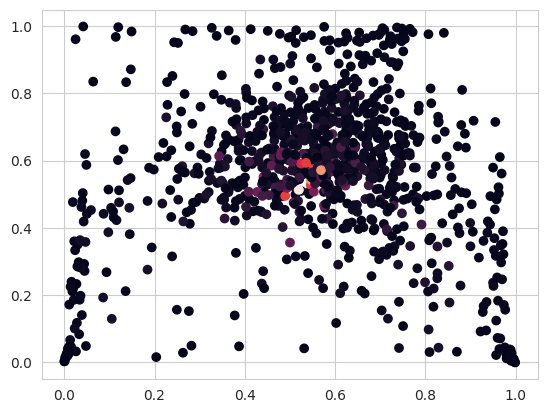

In [17]:
plt.scatter(MC.pts[:,0], MC.pts[:,1], c=MC.weights)

In [18]:
for _ in range(6):
    MC.ordered_point_propose_compare_update_pytorch(lr=1e-5, use_tqdm=True)
    self.ll, self.expected_num_edges = self.calculate_ll()
    # print(f'const: {self.const}, expected_num_edges: {self.expected_num_edges}')
    self.calibrate_const()
    self.ll, self.expected_num_edges = self.calculate_ll()
    # print(f'const: {self.const}, expected_num_edges: {self.expected_num_edges}')
    self.calibrate_const()
    self.ll, self.expected_num_edges = self.calculate_ll()
    print(f'll: {self.ll}')

    g_out, A_out, out, pec, pfew = MC.get_CM(MC.A)
    print(f'pec: {pec}')

# for _ in range(2):
#     self.ll, self.expected_num_edges = self.calculate_ll()
#     print(f'const: {self.const}, expected_num_edges: {self.expected_num_edges}')
#     self.calibrate_const()
# self.ll, self.expected_num_edges = self.calculate_ll()
# print(f'const: {self.const}, expected_num_edges: {self.expected_num_edges}')

100%|██████████| 1000/1000 [00:01<00:00, 531.42it/s]


ll: -160680.34375
pec: 0.27697865792466714


100%|██████████| 1000/1000 [00:01<00:00, 500.01it/s]


ll: -160466.34375
pec: 0.27932026493610757


100%|██████████| 1000/1000 [00:01<00:00, 531.98it/s]


ll: -160267.46875
pec: 0.28146116277513883


100%|██████████| 1000/1000 [00:01<00:00, 533.95it/s]


ll: -160083.515625
pec: 0.279454071051047


100%|██████████| 1000/1000 [00:01<00:00, 528.34it/s]


ll: -159918.640625
pec: 0.2787850404763498


100%|██████████| 1000/1000 [00:01<00:00, 532.50it/s]


ll: -159763.484375
pec: 0.28299993309694255


In [19]:
for _ in range(6):
    MC.ordered_point_propose_compare_update_pytorch(lr=1e-4, use_tqdm=True)
    self.ll, self.expected_num_edges = self.calculate_ll()
    # print(f'const: {self.const}, expected_num_edges: {self.expected_num_edges}')
    self.calibrate_const()
    self.ll, self.expected_num_edges = self.calculate_ll()
    # print(f'const: {self.const}, expected_num_edges: {self.expected_num_edges}')
    self.calibrate_const()
    self.ll, self.expected_num_edges = self.calculate_ll()
    print(f'll: {self.ll}')

    g_out, A_out, out, pec, pfew = MC.get_CM(MC.A)
    print(f'pec: {pec}')


100%|██████████| 1000/1000 [00:02<00:00, 459.46it/s]


ll: -158598.890625
pec: 0.2890212082692179


100%|██████████| 1000/1000 [00:02<00:00, 470.18it/s]


ll: -157720.359375
pec: 0.293403358533485


100%|██████████| 1000/1000 [00:02<00:00, 472.20it/s]


ll: -157012.078125
pec: 0.2932695524185455


100%|██████████| 1000/1000 [00:02<00:00, 474.04it/s]


ll: -156497.28125
pec: 0.29537699872884193


100%|██████████| 1000/1000 [00:02<00:00, 426.06it/s]


ll: -156075.265625
pec: 0.29658125376329697


100%|██████████| 1000/1000 [00:02<00:00, 467.29it/s]


ll: -155731.484375
pec: 0.3017996922459356


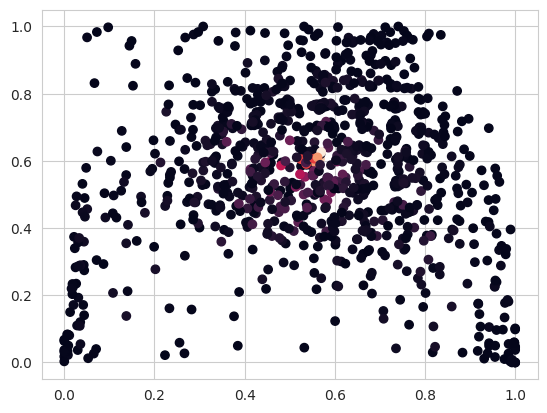

In [20]:
plt.scatter(MC.pts[:,0], MC.pts[:,1], c=MC.weights)

In [9]:
for _ in range(6):
    MC.ordered_point_propose_compare_update_pytorch2(lr=3e-5, use_tqdm=True)
    self.ll, self.expected_num_edges = self.calculate_ll()
    # print(f'const: {self.const}, expected_num_edges: {self.expected_num_edges}')
    self.calibrate_const()
    print(f'll: {self.ll}')

    g_out, A_out, out, pec, pfew = MC.get_CM(MC.A)
    print(f'pec: {pec}')

# for _ in range(2):
#     self.ll, self.expected_num_edges = self.calculate_ll()
#     print(f'const: {self.const}, expected_num_edges: {self.expected_num_edges}')
#     self.calibrate_const()
# self.ll, self.expected_num_edges = self.calculate_ll()
# print(f'const: {self.const}, expected_num_edges: {self.expected_num_edges}')

100%|██████████| 1000/1000 [00:02<00:00, 456.13it/s]


ll: -166921.296875
pec: 0.2665004156275977


100%|██████████| 1000/1000 [00:01<00:00, 536.31it/s]


ll: -167722.421875
pec: 0.26264339152119703


100%|██████████| 1000/1000 [00:01<00:00, 533.69it/s]


ll: -168617.3125
pec: 0.2598836242726517


100%|██████████| 1000/1000 [00:01<00:00, 532.18it/s]


ll: -169680.96875
pec: 0.2514380714879468


100%|██████████| 1000/1000 [00:01<00:00, 532.48it/s]


ll: -171142.515625
pec: 0.24698254364089775


100%|██████████| 1000/1000 [00:01<00:00, 527.40it/s]


ll: -173225.75
pec: 0.240166251039069


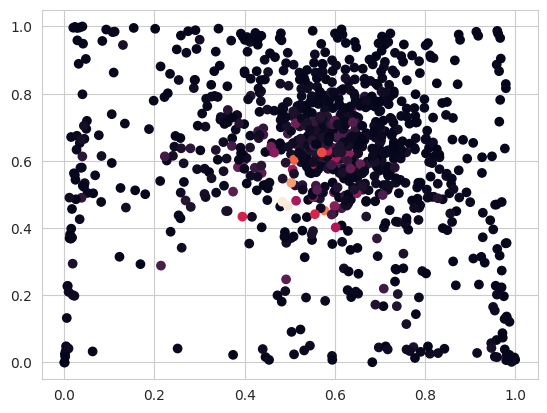

In [32]:
plt.scatter(MC.pts[:,0], MC.pts[:,1], c=MC.weights)

In [34]:
g_out, A_out, out, pec, pfew = MC.get_CM(MC.A)
out
pec

/cluster/home/bdayan/girgs/benji_src/benji_girgs/generation.py:735: RuntimeWarning: divide by zero encountered in divide
  puv = np.stack([np.ones(original_edge_dists.shape), const_in * ((wu * wv / W) / original_edge_dists ** d) ** alpha]).min(axis=0)
/cluster/home/bdayan/girgs/benji_src/benji_girgs/generation.py:736: RuntimeWarning: divide by zero encountered in divide
  puv_cube = np.stack([np.ones(cube_edge_dists.shape), const_in * ((wu * wv / W) / cube_edge_dists ** d) ** alpha]).min(axis=0)


array([[ 15298,  44630],
       [ 44328, 895744]])

0.2552729942597784

In [21]:
for _ in range(4):
    self.ll, self.expected_num_edges = self.calculate_ll()
    print(f'expec num edges: {self.expected_num_edges}, desired: {self.g.numberOfEdges()}')
    print(f'new const: {self.const}; new const_in: {self.const_in}')
    self.calibrate_const()

expec num edges: 31368.244140625, desired: 29964
new const: 0.055292409329219354; new const_in: 0.14065110792301738
expec num edges: 30038.828125, desired: 29964
new const: 0.04819413973423048; new const_in: 0.11764419192658362
expec num edges: 29968.7109375, desired: 29964
new const: 0.0478348677539959; new const_in: 0.11650536897991774
expec num edges: 29964.2734375, desired: 29964
new const: 0.04781231060710925; new const_in: 0.11643395254643364


In [56]:
self.const = float(self.const)

In [57]:
self.const

1.1237229108810425

In [58]:
self.expected_num_edges

tensor(74137.4375)

In [26]:
for _ in range(4):
    self.ll, self.expected_num_edges = self.calculate_ll()
    print(f'expec num edges: {self.expected_num_edges}, desired: {self.g.numberOfEdges()}')
    ratio = self.expected_num_edges / self.g.numberOfEdges()
    print(f'ratio: {ratio}')
    self.const = self.const/ratio
    self.const_in = generation.const_conversion(self.const, self.alpha, d=self.d, true_volume=True)

    print(f'new const: {self.const}; new const_in: {self.const_in}')
    # self.calibrate_const()

expec num edges: 67716.8515625, desired: 29874
ratio: 2.2667486667633057
new const: 0.5208921432495117; new const_in: 0.42832374572753906
expec num edges: 75874.34375, desired: 29874
ratio: 2.5398120880126953
new const: 0.8203632831573486; new const_in: 0.7730509042739868
expec num edges: 83404.640625, desired: 29874
ratio: 2.7918806076049805
new const: 1.1753557920455933; new const_in: 1.2337300777435303
expec num edges: 90194.6796875, desired: 29874
ratio: 3.019169807434082
new const: 1.5571906566619873; new const_in: 1.7784608602523804


In [29]:
self.d

2

In [21]:
self.expected_num_edges / self.g.numberOfEdges()

tensor(2.4636)

In [39]:
g_out, A_out, out, pec, pfew = MC.get_CM(MC.A)
out
pec

array([[  2020,   5966],
       [  7246, 144768]])

0.2529426496368645

In [138]:
lr = 1e-4
self.pts.requires_grad = True
optimizer = torch.optim.SGD((self.pts,), lr=lr, momentum=0.9)

##############
u_index = np.argsort(-self.weights)[0]

#
print(u_index)
# binary_mask = torch.zeros_like(self.pts)
# _ = binary_mask[u_index].fill_(1.)
# pts_temp = self.pts * binary_mask
# # if other values are needed
# pts_temp += self.pts.detach() * binary_mask.logical_not()
#
# orig = self.pts
# self.pts = pts_temp

gradient_mask = torch.zeros_like(self.pts)
_ = gradient_mask[u_index].fill_(1.)
self.pts.register_hook(lambda grad: grad.mul_(gradient_mask))


p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
    self.weights, self.pts, self.alpha, self.const_in,
    u_index, self.failure_prob, self.cl_mixin_prob,
    self.c_cl)
u_ll_new = self.p_u_to_vs_to_ll_pytorch(self.g, u_index, p_u_to_vs2)

u_ll_new.backward()
optimizer.step()

# self.pts = orig

self.pts = torch.clamp(self.pts, 0, 1)

#############
optimizer.zero_grad()
u_index = np.argsort(-self.weights)[1]
print(u_index)
# binary_mask = torch.zeros_like(self.pts)
# _ = binary_mask[u_index].fill_(1.)
# pts_temp = self.pts * binary_mask
# # if other values are needed
# pts_temp += self.pts.detach() * binary_mask.logical_not()

gradient_mask = torch.zeros_like(self.pts)
_ = gradient_mask[u_index].fill_(1.)
self.pts.register_hook(lambda grad: grad.mul_(gradient_mask))


p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
    self.weights, self.pts, self.alpha, self.const_in,
    u_index, self.failure_prob, self.cl_mixin_prob,
    self.c_cl)
u_ll_new = self.p_u_to_vs_to_ll_pytorch(self.g, u_index, p_u_to_vs2)

u_ll_new.backward()
optimizer.step()


tensor(0)


tensor(9)


In [139]:
MC.pts

tensor([[0.3845, 0.5730],
        [0.9500, 0.7354],
        [0.0000, 0.9500],
        [0.2050, 0.4441],
        [0.3848, 0.2375],
        [0.1902, 0.0918],
        [0.1448, 0.4344],
        [0.0500, 0.9500],
        [0.0000, 1.0000],
        [0.0916, 0.7002],
        [0.3487, 0.4444],
        [0.1799, 0.3393],
        [0.8276, 0.5728],
        [0.2301, 0.3936],
        [0.3206, 0.0625],
        [0.2381, 0.6251],
        [0.2315, 0.0500],
        [0.1476, 0.5431],
        [0.9500, 0.7937],
        [0.2104, 0.0000]], grad_fn=<AliasBackward>)

In [ ]:
lr = 1e-4
self.pts.requires_grad = True

##############
u_index = np.argsort(-self.weights)[0]
# print(u_index)
binary_mask = torch.zeros_like(self.pts)
_ = binary_mask[u_index].fill_(1.)
pts_temp = self.pts * binary_mask
# if other values are needed
pts_temp += self.pts.detach() * binary_mask.logical_not()

orig = self.pts
self.pts = pts_temp

# foo = self.pts[0]
# foo.requires_grad = True
optimizer = torch.optim.SGD((orig,), lr=lr, momentum=0.9)

p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
    self.weights, self.pts, self.alpha, self.const_in,
    u_index, self.failure_prob, self.cl_mixin_prob,
    self.c_cl)
u_ll_new = self.p_u_to_vs_to_ll_pytorch(self.g, u_index, p_u_to_vs2)

u_ll_new.backward()
optimizer.step()

self.pts = orig

In [113]:
self.pts.register_hook

<bound method Tensor.register_hook of tensor([[0.8919, 0.0220],
        [0.0240, 0.4417],
        [0.8093, 0.3903],
        [0.5415, 0.1203],
        [0.6630, 0.3565],
        [0.7510, 0.4052],
        [0.4182, 0.4223],
        [0.5462, 0.3932],
        [0.7337, 0.4778],
        [0.9056, 0.6628],
        [0.7524, 0.4612],
        [0.4094, 0.6480],
        [0.9145, 0.9500],
        [0.5417, 0.3520],
        [0.6882, 0.4116],
        [0.7345, 0.5130],
        [0.9600, 0.7491],
        [0.8487, 0.6551],
        [0.5420, 0.4986],
        [0.5812, 0.0480],
        [0.0831, 0.9356],
        [0.6056, 0.0020],
        [0.7472, 0.2331],
        [0.8505, 0.2608],
        [0.7795, 0.2761],
        [0.7127, 0.5354],
        [0.6009, 0.5664],
        [0.7050, 0.6162],
        [0.5791, 0.3237],
        [0.5086, 0.2766],
        [0.9520, 0.4151],
        [0.7766, 0.3344],
        [0.7982, 0.9800],
        [0.6379, 0.0440],
        [0.7829, 0.1775],
        [0.6843, 0.3056],
        [0.6389, 0.7083],


In [110]:
lr = 1e-4
self.pts.requires_grad = True


##############
u_index = np.argsort(-self.weights)[0]


# print(u_index)
binary_mask = torch.zeros_like(self.pts)
_ = binary_mask[u_index].fill_(1.)
pts_temp = self.pts * binary_mask
# if other values are needed
pts_temp += self.pts.detach() * binary_mask.logical_not()

orig = self.pts
self.pts = pts_temp

# foo = self.pts[0]
# foo.requires_grad = True
optimizer = torch.optim.SGD((orig,), lr=lr, momentum=0.9)

p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
    self.weights, self.pts, self.alpha, self.const_in,
    u_index, self.failure_prob, self.cl_mixin_prob,
    self.c_cl)
u_ll_new = self.p_u_to_vs_to_ll_pytorch(self.g, u_index, p_u_to_vs2)

u_ll_new.backward()
optimizer.step()

self.pts = orig

self.pts = torch.clamp(self.pts, 0, 1)

#############

u_index = np.argsort(-self.weights)[1]
# print(u_index)
binary_mask = torch.zeros_like(self.pts)
_ = binary_mask[u_index].fill_(1.)
pts_temp = self.pts * binary_mask
# if other values are needed
pts_temp += self.pts.detach() * binary_mask.logical_not()

orig = self.pts
self.pts = pts_temp

# foo = self.pts[0]
# foo.requires_grad = True
optimizer = torch.optim.SGD((orig,), lr=lr, momentum=0.9)

p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
    self.weights, self.pts, self.alpha, self.const_in,
    u_index, self.failure_prob, self.cl_mixin_prob,
    self.c_cl)
u_ll_new = self.p_u_to_vs_to_ll_pytorch(self.g, u_index, p_u_to_vs2)

u_ll_new.backward()
optimizer.step()

self.pts = orig#

ValueError: can't optimize a non-leaf Tensor

In [ ]:
MC.pts

In [126]:
lr = 1e-4
self.pts.requires_grad = True
optimizer = torch.optim.SGD((self.pts,), lr=lr, momentum=0.9)

##############
u_index = np.argsort(-self.weights)[0]

#
print(u_index)
# binary_mask = torch.zeros_like(self.pts)
# _ = binary_mask[u_index].fill_(1.)
# pts_temp = self.pts * binary_mask
# # if other values are needed
# pts_temp += self.pts.detach() * binary_mask.logical_not()
#
# orig = self.pts
# self.pts = pts_temp

gradient_mask = torch.zeros_like(self.pts)
_ = gradient_mask[u_index].fill_(1.)
self.pts.register_hook(lambda grad: grad.mul_(gradient_mask))


p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
    self.weights, self.pts, self.alpha, self.const_in,
    u_index, self.failure_prob, self.cl_mixin_prob,
    self.c_cl)
u_ll_new = self.p_u_to_vs_to_ll_pytorch(self.g, u_index, p_u_to_vs2)

u_ll_new.backward()
optimizer.step()

# self.pts = orig

self.pts = torch.clamp(self.pts, 0, 1)

#############
optimizer.zero_grad()
u_index = np.argsort(-self.weights)[1]
# print(u_index)
# binary_mask = torch.zeros_like(self.pts)
# _ = binary_mask[u_index].fill_(1.)
# pts_temp = self.pts * binary_mask
# # if other values are needed
# pts_temp += self.pts.detach() * binary_mask.logical_not()

gradient_mask = torch.zeros_like(self.pts)
_ = gradient_mask[u_index].fill_(1.)
self.pts.register_hook(lambda grad: grad.mul_(gradient_mask))


p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
    self.weights, self.pts, self.alpha, self.const_in,
    u_index, self.failure_prob, self.cl_mixin_prob,
    self.c_cl)
u_ll_new = self.p_u_to_vs_to_ll_pytorch(self.g, u_index, p_u_to_vs2)

u_ll_new.backward()
optimizer.step()


tensor(14)


In [127]:
MC.pts

tensor([[0.8140, 0.1462],
        [0.8091, 0.0000],
        [0.5502, 0.1906],
        [1.0000, 0.9500],
        [0.6638, 0.0500],
        [0.9500, 0.6989],
        [0.8333, 0.4621],
        [0.3819, 0.7609],
        [0.0000, 0.8146],
        [0.4828, 0.6011],
        [0.9500, 0.9460],
        [0.7018, 0.5130],
        [0.7495, 0.8976],
        [0.5714, 0.1176],
        [0.6850, 0.5363],
        [0.7996, 0.7295],
        [0.0500, 0.8291],
        [0.7759, 0.9500],
        [0.8336, 0.4806],
        [0.4523, 0.5385]], grad_fn=<AliasBackward>)

In [ ]:

MC.ordered_point_propose_compare_update_pytorch(lr=3e-4, use_tqdm=True)

In [99]:
torch.cuda.memory_allocated()

AttributeError: 'NoneType' object has no attribute 'lower'

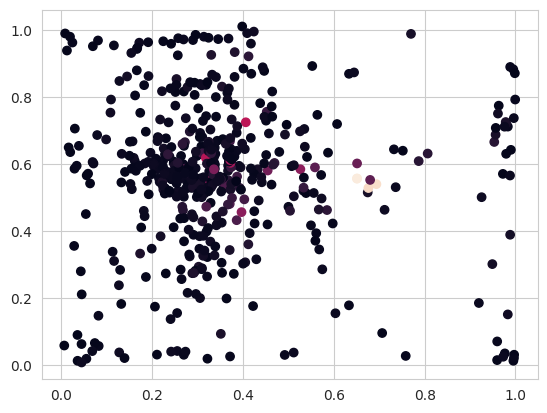

In [73]:
MC.pts = MC.pts.detach()
plt.scatter(MC.pts[:,0], MC.pts[:,1], c=MC.weights)

In [74]:
MC.pts = MC.pts.detach()
g_out, A_out, out, pec, pfew = MC.get_CM(MC.A)
out
pec

array([[  3942,  11032],
       [ 15352, 219674]])

0.26325631093896085

In [46]:
self.pts.requires_grad = True
# torch.autograd.set_detect_anomaly(True)

u_index = np.argsort(-self.weights)[0]
for u_index in np.argsort(-self.weights):  # largest to smallest
    print(u_index)
    binary_mask = torch.zeros_like(self.pts)
    _ = binary_mask[u_index].fill_(1.)
    pts_temp = self.pts * binary_mask
    #if other values are needed
    pts_temp += self.pts.detach() * binary_mask.logical_not()

    orig = self.pts
    self.pts = pts_temp


    # foo = self.pts[0]
    # foo.requires_grad = True
    optimizer = torch.optim.SGD((orig,), lr=0.001, momentum=0.9)

    optimizer.zero_grad()
    p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
        self.weights, self.pts, self.alpha, self.const_in,
        u_index, self.failure_prob, self.cl_mixin_prob,
        self.c_cl)
    u_ll_new = self.p_u_to_vs_to_ll_pytorch(self.g, u_index, p_u_to_vs2)

    u_ll_new.backward()
    optimizer.step()

    self.pts = orig
    print(self.pts)

tensor(24)
tensor([[0.1421, 0.0250],
        [0.5532, 0.0500],
        [0.0744, 0.6039],
        [0.1448, 0.1027],
        [0.9497, 0.2401],
        [0.9500, 0.1992],
        [0.4841, 0.6513],
        [0.5086, 0.6315],
        [0.0250, 0.5713],
        [0.6482, 0.9500],
        [0.0000, 0.4163],
        [0.6368, 0.4639],
        [0.4314, 0.5472],
        [0.1213, 0.5694],
        [0.5452, 0.8649],
        [0.5510, 0.9488],
        [0.3365, 0.5766],
        [0.5085, 0.6917],
        [0.5717, 0.2047],
        [0.6685, 0.9750],
        [0.5627, 0.9500],
        [0.4097, 0.5692],
        [0.2133, 0.6037],
        [0.2358, 0.6082],
        [0.4005, 0.5085],
        [0.6036, 0.5489],
        [0.5947, 0.7905],
        [0.3961, 0.6690],
        [0.0500, 0.6078],
        [0.6234, 0.4961],
        [0.0884, 0.4370],
        [0.2269, 0.0000],
        [0.0744, 0.6039],
        [0.3298, 0.5781],
        [0.1958, 0.5628],
        [0.9500, 0.1931],
        [0.9750, 0.1441],
        [0.9083, 0.2726],
 

In [47]:
list(g.iterNeighbors(8))

[2, 3, 6, 7, 22, 24, 28, 32, 39]

In [50]:
MC.pts = MC.pts.detach()
g_out, A_out, out, pec, pfew = MC.get_CM(MC.A)
out
pec

array([[204, 180],
       [238, 978]])

0.53125

In [48]:
# for u_index in np.argsort(-self.weights):  # largest to smallest

In [104]:
u_index = 0

self.pts.requires_grad = True

binary_mask = torch.zeros_like(self.pts)
_ = binary_mask[u_index].fill_(1.)
pts_temp = self.pts * binary_mask
#if other values are needed
pts_temp += self.pts.detach() * binary_mask.logical_not()

orig = self.pts
self.pts = pts_temp


# foo = self.pts[0]
# foo.requires_grad = True
optimizer = torch.optim.SGD((orig,), lr=0.001, momentum=0.9)

optimizer.zero_grad()
p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
    self.weights, self.pts, self.alpha, self.const_in,
    u_index, self.failure_prob, self.cl_mixin_prob,
    self.c_cl)
u_ll_new = self.p_u_to_vs_to_ll_pytorch(self.g, u_index, p_u_to_vs2)

_ = u_ll_new.backward()
_ = optimizer.step()

self.pts = orig

In [94]:
orig

tensor([[0.7754, 0.0945],
        [0.4923, 0.3916],
        [0.7403, 0.1974],
        [0.1634, 0.6636],
        [0.6291, 0.0500],
        [0.6147, 0.2716],
        [0.9500, 0.9500],
        [0.4847, 0.3239],
        [0.7973, 0.2650],
        [0.5965, 0.1223],
        [0.5598, 0.5929],
        [0.0000, 0.6893],
        [0.5113, 0.3339],
        [0.3522, 0.4270],
        [0.5656, 0.2706],
        [0.9500, 0.9500],
        [0.4621, 0.6494],
        [0.7349, 0.0000],
        [0.0500, 0.6114],
        [0.6990, 0.1725]], requires_grad=True)

In [95]:
self.pts.requires_grad

True

In [96]:
u_index = 1

binary_mask = torch.zeros_like(self.pts)
binary_mask[u_index].fill_(1.)
pts_temp = self.pts * binary_mask
#if other values are needed
pts_temp += self.pts.detach() * binary_mask.logical_not()

orig = self.pts
self.pts = pts_temp


# foo = self.pts[0]
# foo.requires_grad = True
optimizer = torch.optim.SGD((orig,), lr=0.001, momentum=0.9)

optimizer.zero_grad()
p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
    self.weights, self.pts, self.alpha, self.const_in,
    u_index, self.failure_prob, self.cl_mixin_prob,
    self.c_cl)
u_ll_new = self.p_u_to_vs_to_ll_pytorch(self.g, u_index, p_u_to_vs2)

u_ll_new.backward()
optimizer.step()

self.pts = orig

tensor([1., 1.])

In [97]:
orig

tensor([[0.7754, 0.0945],
        [0.4905, 0.3978],
        [0.7403, 0.1974],
        [0.1634, 0.6636],
        [0.6291, 0.0500],
        [0.6147, 0.2716],
        [0.9500, 0.9500],
        [0.4847, 0.3239],
        [0.7973, 0.2650],
        [0.5965, 0.1223],
        [0.5598, 0.5929],
        [0.0000, 0.6893],
        [0.5113, 0.3339],
        [0.3522, 0.4270],
        [0.5656, 0.2706],
        [0.9500, 0.9500],
        [0.4621, 0.6494],
        [0.7349, 0.0000],
        [0.0500, 0.6114],
        [0.6990, 0.1725]], requires_grad=True)

In [ ]:


self.pts.requires_grad = True


for u_index in np.argsort(-self.weights):

    binary_mask = torch.zeros_like(self.pts)
    binary_mask[u_index].fill_(1.)
    pts_temp = self.pts * binary_mask
    #if other values are needed
    pts_temp += self.pts.detach() * binary_mask.logical_not()

    orig = self.pts
    self.pts = pts_temp


    # foo = self.pts[0]
    # foo.requires_grad = True
    optimizer = torch.optim.SGD((orig,), lr=0.001, momentum=0.9)

    optimizer.zero_grad()
    p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
        self.weights, self.pts, self.alpha, self.const_in,
        u_index, self.failure_prob, self.cl_mixin_prob,
        self.c_cl)
    u_ll_new = self.p_u_to_vs_to_ll_pytorch(self.g, u_index, p_u_to_vs2)

    u_ll_new.backward()
    optimizer.step()

    self.pts = orig

In [117]:
MC.pts = MC.pts.detach()

In [118]:
MC.get_CM(MC.A)

(<networkit.graph.Graph at 0x2abb66260ea0>,
 array([[0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1],
        [1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1],
        [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1

In [23]:
 MC.ordered_point_propose_compare_update_pytorch()

tensor(nan, grad_fn=<AliasBackward>)

In [24]:
MC.pts

tensor([[   nan, 0.0500],
        [   nan, 0.6763],
        [   nan, 0.5649],
        [   nan, 0.0200],
        [   nan, 0.9500],
        [   nan, 0.8459],
        [   nan, 0.5603],
        [   nan, 0.9600],
        [   nan, 0.4778],
        [   nan, 0.6753],
        [   nan, 0.5810],
        [   nan, 0.5491],
        [   nan, 0.2201],
        [   nan, 0.2640],
        [   nan, 0.0300],
        [   nan, 0.5864],
        [   nan, 0.2963],
        [   nan, 0.5810],
        [   nan, 0.6168],
        [   nan, 0.5810],
        [   nan, 0.1467],
        [   nan, 0.7824],
        [   nan, 0.6896],
        [   nan, 0.5532],
        [   nan, 0.5630],
        [   nan, 0.9266],
        [   nan, 0.0400],
        [   nan, 0.7655],
        [   nan, 0.6050],
        [   nan, 0.4679],
        [   nan, 0.9700],
        [   nan, 0.4686],
        [   nan, 0.1322],
        [   nan, 0.5810],
        [   nan, 0.5584],
        [   nan, 0.5820],
        [   nan, 0.6100],
        [   nan, 0.8849],
        [   

In [49]:

torch.autograd.set_detect_anomaly(True)

MC.pts.requires_grad = True
self = MC
u_index = 0

x_u = self.pts[u_index]

p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
    self.weights, self.pts, self.alpha, self.const_in,
    u_index, self.failure_prob, self.cl_mixin_prob,
    self.c_cl)

u_ll_new = self.p_u_to_vs_to_ll_pytorch(self.g, u_index, p_u_to_vs2)
# u_ll_new = torch.log(p_u_to_vs2).sum()

# u_ll_new = MC.ordered_point_propose_compare_update_pytorch()

In [50]:
u_ll_new.backward()

In [52]:
MC.pts

tensor([[0.3760, 0.0582],
        [0.9280, 0.8201],
        [0.9800, 0.7434],
        [0.4393, 0.3245],
        [0.4959, 0.5198],
        [0.5112, 0.5850],
        [0.0200, 0.5144],
        [0.4959, 0.5198],
        [0.5380, 0.3146],
        [0.4446, 0.4205],
        [0.5288, 0.4837],
        [0.4959, 0.5198],
        [0.1776, 0.5693],
        [0.3463, 0.6461],
        [0.0300, 0.9149],
        [0.3963, 0.3683],
        [0.9460, 0.7381],
        [0.1452, 0.4083],
        [0.7365, 0.9600],
        [0.4428, 0.4390],
        [0.1710, 0.5064],
        [0.4485, 0.0000],
        [0.1151, 0.0500],
        [0.6516, 0.4961],
        [0.4721, 0.6958],
        [0.5749, 0.4856],
        [0.9900, 0.4669],
        [0.3644, 0.4154],
        [0.3006, 0.5661],
        [0.3283, 0.2634],
        [0.5071, 0.5559],
        [0.3071, 0.3599],
        [0.0100, 0.6070],
        [0.0500, 0.5131],
        [0.4959, 0.5198],
        [0.3941, 0.4235],
        [0.6047, 0.9700],
        [0.4959, 0.5198],
        [0.2

In [51]:
MC.pts.grad

tensor([[-8.8795,  0.0000],
        [ 2.9326,  0.0000],
        [ 1.7782,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 2.3488,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0

In [43]:
weights, pts, alpha, const_in, u_index, failure_prob, cl_mixin_prob, c_cl = MC.weights, MC.pts, MC.alpha, MC.const_in, u_index, MC.failure_prob, MC.cl_mixin_prob, MC.c_cl

eps = 1e-7

n, d = pts.shape
wuwv = weights[u_index] * weights
dists = pts[u_index].dist(pts)
p_uv = torch.divide(wuwv, dists ** d)
p_uv = torch.pow(p_uv, alpha)
# p_uv = torch.minimum(const_in * p_uv, torch.ones_like(p_uv))
#
# p_u_to_vs = p_uv

In [44]:
p_uv

tensor([       inf, 2.0620e-01, 1.5802e-01, 9.4273e+01, 3.4346e+01, 1.2546e+01,
        6.2458e-01, 3.4346e+01, 7.3167e+00, 6.0307e+01, 7.1373e+00, 3.4346e+01,
        6.4651e+00, 9.1422e+02, 5.6542e-01, 1.6645e+03, 1.8373e-01, 1.6194e+00,
        7.8713e-01, 7.3148e+01, 4.0596e+00, 4.9775e+01, 1.5399e+00, 2.1933e+00,
        2.3196e+01, 6.3168e+00, 4.3627e-01, 1.0859e+04, 4.2427e+01, 1.8400e+02,
        2.6526e+01, 7.0641e+01, 5.0679e-01, 9.1514e-01, 3.4346e+01, 4.0244e+03,
        1.9736e+00, 3.4346e+01, 1.9056e+01, 9.8349e+02, 5.0147e+02, 1.3331e+01,
        3.5548e+01, 8.7896e+00, 1.5966e+01, 1.1593e+01, 3.9224e-01, 2.3401e+00,
        1.0723e+00, 1.3802e+03, 2.1793e+00, 3.4346e+01, 4.6878e+00, 3.1165e+01,
        3.0627e+02, 1.6907e+01, 2.9882e+02, 3.4346e+01, 6.7827e+01, 1.5969e-01,
        1.5923e+03, 2.1022e+01, 5.7847e+00, 1.6841e+00, 8.1953e-01, 9.1313e-01,
        3.4346e+01, 1.1320e+02, 4.9427e+00, 1.2177e+01, 3.6662e+01, 6.3341e+00,
        2.9120e+02, 6.8249e+00, 2.9894e+

In [20]:
list(MC.g.iterNeighbors(1))

[2,
 4,
 5,
 7,
 8,
 11,
 12,
 18,
 23,
 25,
 26,
 30,
 34,
 37,
 38,
 41,
 42,
 43,
 44,
 45,
 51,
 53,
 54,
 57,
 58,
 60,
 64,
 66,
 69,
 71,
 73,
 74,
 75,
 77,
 80,
 81,
 82,
 83,
 85,
 86,
 97]

In [8]:
p_u_to_vs2[0].backward()

In [9]:
MC.pts.requires_grad

True

In [10]:
p_u_to_vs2

tensor([0.3290, 0.5011, 0.4974, 0.5711, 0.7148, 0.5637, 0.4974, 0.7148, 0.5526,
        0.5342, 0.5269, 0.7148, 0.6263, 0.6300, 0.4790, 0.5563, 0.4974, 0.4790,
        0.5305, 0.5526, 0.5563, 0.1692, 0.2575, 0.5821, 0.5232, 0.6226, 0.4974,
        0.6374, 0.5195, 0.5423, 0.7074, 0.5600, 0.4826, 0.5158, 0.7148, 0.6742,
        0.4974, 0.7148, 0.6153, 0.4863, 0.2511, 0.5379, 0.5784, 0.6448, 0.5232,
        0.5563, 0.5084, 0.5342, 0.5490, 0.2281, 0.4937, 0.7148, 0.5674, 0.6705,
        0.5969, 0.3698, 0.3130, 0.7148, 0.5969, 0.4937, 0.6742, 0.5011, 0.6005,
        0.5158, 0.5637, 0.5232, 0.7148, 0.2264, 0.5121, 0.6595, 0.4686, 0.6779,
        0.4937, 0.6890, 0.5711, 0.6079, 0.4866, 0.7148, 0.4201, 0.5711, 0.7148,
        0.6079, 0.5084, 0.7148, 0.4900, 0.5121, 0.7148, 0.4900, 0.6411, 0.5747,
        0.5158, 0.6963, 0.1923, 0.4716, 0.4863, 0.6411, 0.3025, 0.6079, 0.4974,
        0.5379], grad_fn=<AliasBackward>)

In [11]:
u_ll_new.grad

/cluster/apps/nss/gcc-6.3.0/python_gpu/3.8.5/torch/tensor.py:995: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  ret = func(*args, **kwargs)


In [12]:
MC.pts.grad

tensor([[ 0.0000,  0.4562],
        [    nan, -0.4562],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0.0000],
        [ 0.0000,  0

In [106]:
u_ll_new.backward()

In [116]:
MC.pts.grad

tensor([[0., 0.],
        [nan, 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [

In [76]:
MC.pts[u_index].grad is None

True

In [42]:
torch.minimum(torch.ones_like(self.weights), self.weights)

tensor([0.9908, 0.9908, 0.7463, 0.3989, 0.7077, 0.5662, 0.9393, 0.9007, 0.7720,
        1.0000, 0.4632, 0.8235, 0.6434, 0.6434, 0.6176, 1.0000, 1.0000, 0.6176,
        1.0000, 0.6434, 1.0000, 0.5404, 0.8621, 0.5147, 1.0000, 1.0000, 1.0000,
        0.6691, 0.5919, 0.7592, 1.0000, 0.7463, 0.4632, 0.5404, 0.8492, 0.7978,
        0.7592, 0.6048, 0.4246, 1.0000, 0.4503, 1.0000, 1.0000, 0.5276, 0.9522,
        0.7978, 0.8750, 0.4890, 0.7978, 0.5533, 0.4890, 0.8364, 0.5404, 0.9007,
        0.4503, 0.7206, 1.0000, 0.8364, 1.0000, 0.7592, 0.9522, 0.8492, 0.6434,
        0.4761, 1.0000, 0.5662, 0.5919, 1.0000, 0.7592, 0.5662, 0.6434, 0.7334,
        0.4632, 1.0000, 0.6562, 0.5404, 0.6434, 0.6305, 0.5276, 0.9650, 0.5404,
        1.0000, 1.0000, 1.0000, 0.6305, 0.4503, 0.4761, 0.7334, 0.7720, 0.6434,
        0.7978, 0.7592, 0.5662, 1.0000, 0.7720, 0.9522, 0.4246, 1.0000, 0.6048,
        0.5662])

In [43]:
self = MC
p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs_pytorch(
    self.weights, self.pts, self.alpha, self.const_in,
    u_index, self.failure_prob, self.cl_mixin_prob,
    self.c_cl)

In [44]:
p_u_to_vs2

tensor([0.8500, 0.8500, 0.7399, 0.5584, 0.7198, 0.6458, 0.8408, 0.8206, 0.7534,
        0.8500, 0.5115, 0.7803, 0.6862, 0.6862, 0.6727, 0.8500, 0.8500, 0.6727,
        0.8500, 0.6862, 0.8500, 0.6324, 0.8004, 0.6189, 0.8500, 0.8500, 0.8500,
        0.6996, 0.6593, 0.7467, 0.8500, 0.7399, 0.5920, 0.6324, 0.7937, 0.7668,
        0.7467, 0.6660, 0.5719, 0.8500, 0.5853, 0.8500, 0.8500, 0.6256, 0.8475,
        0.7668, 0.8072, 0.6055, 0.7668, 0.6391, 0.6055, 0.7870, 0.6324, 0.8206,
        0.5853, 0.7265, 0.8500, 0.7870, 0.8500, 0.7467, 0.8475, 0.7937, 0.6862,
        0.5988, 0.8500, 0.6458, 0.6593, 0.8500, 0.7467, 0.6458, 0.6862, 0.7332,
        0.5920, 0.8500, 0.6929, 0.6324, 0.6862, 0.6794, 0.6212, 0.8500, 0.6324,
        0.8500, 0.8500, 0.8500, 0.6794, 0.5853, 0.5392, 0.7332, 0.7534, 0.6862,
        0.7668, 0.7467, 0.6458, 0.8500, 0.7534, 0.8475, 0.5719, 0.8500, 0.6660,
        0.6458])

In [11]:
u_index = 0
x_u = MC.pts[u_index].clone()

nhbs = list(MC.g.iterNeighbors(u_index))
mean_pos = MC.pts[nhbs].mean(axis=0)

self = MC
num_proposals = 10

x_u2s = torch.cat([
    # near to current position
    self.proposal_pytorch(num_proposals//4, self.d, sigma=3/self.n, x_u=x_u, p_normal=0.7),
    # near to mean position
    self.proposal_pytorch(num_proposals//4, self.d, sigma=3/self.n, x_u=mean_pos, p_normal=0.7),
    # near to neighbours
    self.proposal_pytorch(num_proposals//2, self.d, sigma=3/self.n,
                  x_u=self.pts[nhbs][np.random.choice(len(nhbs), size=num_proposals//2)],
                  p_normal=0.7).view((-1,) + x_u.shape),
])

In [13]:
x_u2s.shape

torch.Size([29, 2])

In [23]:
x_u

PointsCube([0.43323099, 0.23920836])

In [25]:
size = (4, 2)
sigma=0.01
uniforms = torch.rand(size=size)
normals = torch.clamp(x_u + torch.normal(0, sigma,size=size), 0, 1)
masks = torch.bernoulli(torch.ones(size) * p_normal)

TypeError: unsupported operand type(s) for +: 'PointsCube' and 'Tensor'

In [18]:
import torch
torch.rand(size=(3,2))

tensor([[0.2566, 0.2763],
        [0.5554, 0.0358],
        [0.3582, 0.5824]])

In [22]:
torch.clamp(torch.normal(0, 0.01, size=(3,2)), 0, 1)

tensor([[0.0017, 0.0222],
        [0.0000, 0.0000],
        [0.0048, 0.0161]])

In [15]:
MC.pts[nhbs][np.random.choice(len(nhbs), size=10//2)]

PointsCube([[0.65155597, 0.39935438],
            [0.53066949, 0.52614558],
            [0.51379326, 0.56633007],
            [0.7136102 , 0.6277372 ],
            [0.54132212, 0.61228731]])

In [65]:
import torch
pts = torch.Tensor(MC.pts)

import importlib
importlib.reload(points)

HANDLED_FUNCTIONS={}
class PointsCubePytorch(points.PointsTrue):
    def __new__(cls, input_array):
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        obj = torch.as_tensor(input_array)
        obj.__cls__ = cls

        # Finally, we must return the newly created object:
        return obj

    @classmethod
    def __torch_function__(cls, func, types, args=(), kwargs=None):
        if kwargs is None:
            kwargs = {}
        if func not in HANDLED_FUNCTIONS or not all(
            issubclass(t, (torch.Tensor, PointsCubePytorch))
            for t in types
        ):
            return NotImplemented
        return HANDLED_FUNCTIONS[func](*args, **kwargs)

    def tempaaa(self):
        print('hi')


class PointsCubePytorch(torch.Tensor):
    def __new__(cls, x):
        return super().__new__(cls, x)

    def dist(self, other, b_vec=None):
        return 2*get_dist_cube(self.to(torch.float16), other.to(torch.float16), b_vec=b_vec)


ptstemp = PointsCubePytorch(MC.pts)

/cluster/home/bdayan/girgs/benji_src/benji_girgs/points.py:239: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (n, d == other.shape)


<module 'benji_girgs.points' from '/cluster/home/bdayan/girgs/benji_src/benji_girgs/points.py'>

In [66]:
foo = points.PointsCubePytorch(MC.pts)

In [67]:
foo[:4].dist(foo[4:8])

tensor([-0.4826,  0.0928, -0.6153,  0.7554])

In [40]:
foo = PointsCubePytorch(MC.pts)

In [52]:
a = (foo[:4] - foo[4:8]).max(axis=-1)


torch.return_types.max

In [56]:
type(foo.max(axis=-1).values)

__main__.PointsCubePytorch

In [20]:
foo = torch.as_tensor(MC.pts)
foo.__cls__ = PointsCubePytorch

In [11]:
torch.as_tensor(MC.pts)

tensor([[0.3048, 0.0400],
        [0.5747, 0.5539],
        [0.3184, 0.0659],
        [0.2707, 0.9800],
        [0.5461, 0.2844],
        [0.7471, 0.5075],
        [0.6261, 0.4642],
        [0.5636, 0.6023],
        [0.5175, 0.3814],
        [0.0000, 0.9810],
        [0.5882, 0.5308],
        [0.0100, 0.9730],
        [0.7805, 0.2310],
        [0.6553, 0.8335],
        [0.5172, 0.2835],
        [0.7558, 0.0000],
        [0.4442, 0.5323],
        [0.5281, 0.9500],
        [0.4364, 0.4377],
        [0.5922, 0.7466],
        [0.4739, 0.6585],
        [0.0637, 0.6662],
        [0.3597, 0.2179],
        [0.9800, 0.9900],
        [0.3862, 0.1139],
        [0.4716, 0.0300],
        [0.9700, 0.9424],
        [0.1858, 0.4113],
        [0.6526, 0.8218],
        [0.3600, 0.6341],
        [0.3635, 0.4050],
        [0.2338, 0.2396],
        [0.6007, 0.5199],
        [0.6170, 0.5422],
        [0.5747, 0.5539],
        [0.3112, 0.7113],
        [0.9500, 0.8390],
        [0.2984, 0.7310],
        [0.7

In [7]:
num_pt_proposals=int(15 * np.log(g.numberOfNodes()) * d2 ** 0.5)
num_alpha_proposals=10
num_const_proposals=10
num_loops=7 + d2 - 1

num_pt_proposals

190

In [8]:
MC.const

0.03945946118870356

In [11]:
from tqdm import tqdm
self = MC
def ordered_point_propose_compare_update(self, num_proposals=100):
    """Similar to mercator, does a round of ordered updates.
    top weight nodes are updated first.
    """
    for u_index in tqdm(np.argsort(-self.weights)):  # largest to smallest
        x_u = self.pts[u_index].copy()

        nhbs = list(self.g.iterNeighbors(u_index))
        mean_pos = self.pts[nhbs].mean(axis=0)

        x_u2s = np.concatenate([
            # near to current position
            self.proposal(num_proposals//4, self.d, sigma=0.01, x_u=x_u, p_normal=0.7),
            # near to mean position
            self.proposal(num_proposals//4, self.d, sigma=0.01, x_u=mean_pos, p_normal=0.7),
            # near to neighbours
            self.proposal(num_proposals//2, self.d, sigma=0.01,
                          x_u=self.pts[nhbs][np.random.choice(len(nhbs), size=num_proposals//2)],
                          p_normal=0.7).reshape((-1,) + x_u.shape),
        ])

        x_u2s = np.concatenate([x_u2s, [mean_pos, x_u]])

        lls = []
        for x_u2 in x_u2s:
            self.pts[u_index] = x_u2
            p_u_to_vs2 = mcmc.MCMC_girg.get_p_u_to_vs(
                self.weights, self.pts, self.alpha, self.const_in,
                u_index, self.failure_prob, self.cl_mixin_prob,
                self.c_cl)
            u_ll_new = self.p_u_to_vs_to_ll(self.g, u_index, p_u_to_vs2)
            lls.append(u_ll_new)


        self.pts[u_index] = x_u2s[np.argmax(lls)]

In [15]:
MC.ordered_point_propose_compare_update = ordered_point_propose_compare_update
MC.ordered_point_propose_compare_update(20)

  4%|▍         | 322/8000 [01:07<26:40,  4.80it/s]


KeyboardInterrupt: 

In [16]:
import pytorch


ModuleNotFoundError: No module named 'pytorch'

In [18]:
import torch

ModuleNotFoundError: No module named 'torch'

In [1]:
import torch

ModuleNotFoundError: No module named 'torch'